# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Não há dados vazios e todos os dados fornecidos são do tipo inteiro.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [5]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


A utilização do boxplot indicou outliers em excesso, dificultando a visualização. Desta forma, vamos fazer o uso de histogramas para entender a distribuição dos dados e direcionar nossos esforços.

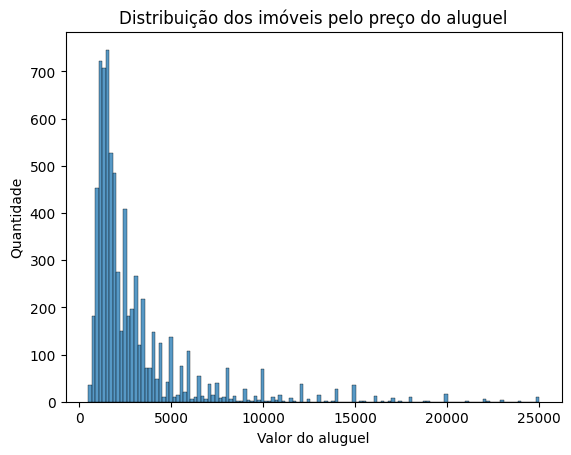

In [52]:
sns.histplot(df['Valor_Aluguel'])
plt.xlabel('Valor do aluguel')
plt.ylabel('Quantidade')
plt.title('Distribuição dos imóveis pelo preço do aluguel')
plt.show()

In [7]:
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_sem_outliers = df[(df['Valor_Aluguel'] >= limite_inferior) & (df['Valor_Aluguel'] <= limite_superior)]
df_sem_outliers.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,2150.560892,654.013790,75.590487,2.204989,1.922529,0.858847,1.286024
std,1129.524158,521.781878,39.715583,0.757810,0.782703,0.686187,0.671761
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1300.000000,373.250000,50.000000,2.000000,1.000000,0.000000,1.000000
50%,1800.000000,550.000000,64.000000,2.000000,2.000000,1.000000,1.000000
75%,2700.000000,800.000000,84.000000,3.000000,2.000000,1.000000,2.000000
max,5900.000000,7500.000000,516.000000,5.000000,7.000000,4.000000,6.000000


Aplicamos a tecnica IQR mas ainda percebemos valores muito altos para condominio e metragem. Diante disso, vamos repetir o processo, entendendo a distribuição de dados com histogramas e aplicando método do IQR.

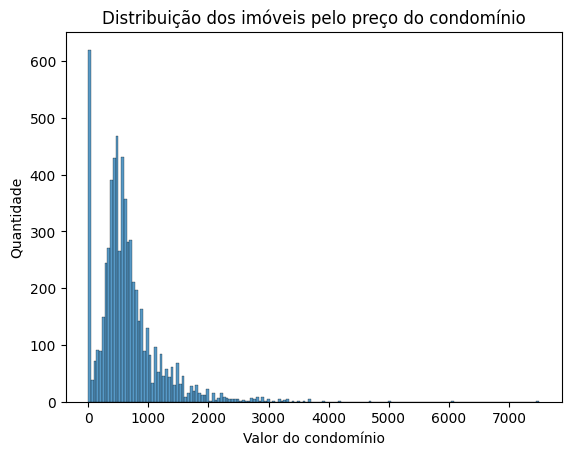

In [53]:
sns.histplot(df_sem_outliers['Valor_Condominio'])
plt.xlabel('Valor do condomínio')
plt.ylabel('Quantidade')
plt.title('Distribuição dos imóveis pelo preço do condomínio')
plt.show()

In [9]:
dfa = df_sem_outliers

In [10]:
Q1ab = dfa['Valor_Condominio'].quantile(0.25)
Q3ab = dfa['Valor_Condominio'].quantile(0.75)
IQRab = Q3ab - Q1ab
limite_inferior = Q1ab - 1.5 * IQRab
limite_superior = Q3ab + 1.5 * IQRab
dfab = dfa[(dfa['Valor_Condominio'] >= limite_inferior) & (dfa['Valor_Condominio'] <= limite_superior)]
dfab.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000
mean,2029.365050,548.281104,68.769732,2.131940,1.829097,0.782274,1.195987
std,1033.175125,328.023059,28.180213,0.710575,0.663398,0.586194,0.550556
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1300.000000,350.000000,50.000000,2.000000,1.000000,0.000000,1.000000
50%,1700.000000,529.500000,62.000000,2.000000,2.000000,1.000000,1.000000
75%,2500.000000,732.000000,78.000000,3.000000,2.000000,1.000000,1.000000
max,5900.000000,1440.000000,300.000000,5.000000,7.000000,4.000000,5.000000


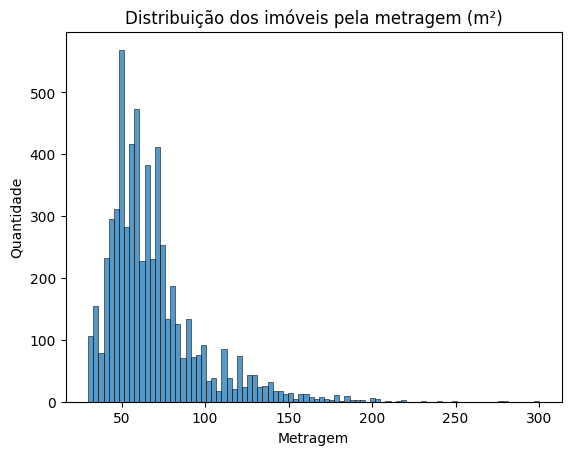

In [54]:
sns.histplot(dfab['Metragem'])
plt.xlabel('Metragem')
plt.ylabel('Quantidade')
plt.title('Distribuição dos imóveis pela metragem (m²)')
plt.show()

Apesar do valor máximo de aluguel ter atingido um nível aceitável, percebemos que ainda há condomínios e metragens muito altas. Vamos repetir o processo até que esses dados não estejam tão longe de suas médias.

In [12]:
Q1abc = dfab['Metragem'].quantile(0.25)
Q3abc = dfab['Metragem'].quantile(0.75)
IQRabc = Q3abc - Q1abc
limite_inferior = Q1abc - 1.5 * IQRabc
limite_superior = Q3abc + 1.5 * IQRabc
dfabc = dfab[(dfab['Metragem'] >= limite_inferior) & (dfab['Metragem'] <= limite_superior)]
dfabc.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,5609.000000,5609.000000,5609.000000,5609.000000,5609.000000,5609.000000,5609.000000
mean,1915.888572,519.054377,63.563202,2.068283,1.756641,0.722410,1.143341
std,920.519610,301.171690,19.111906,0.673109,0.538598,0.495485,0.488227
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1250.000000,350.000000,50.000000,2.000000,1.000000,0.000000,1.000000
50%,1600.000000,500.000000,60.000000,2.000000,2.000000,1.000000,1.000000
75%,2400.000000,700.000000,74.000000,3.000000,2.000000,1.000000,1.000000
max,5900.000000,1440.000000,120.000000,4.000000,5.000000,3.000000,4.000000


Desta forma, apesar de termos descartado 1594 linhas (22%) da nossa tabela, consideramos satisfatórios o volume de dados restantes e os valores apresentados para dar seguimento aos estudos de regressão.

Na análise bivariada, o gráfico de dispersão foi nossa melhor opção de visualização  devido ao formato dos dados e o grande volume.

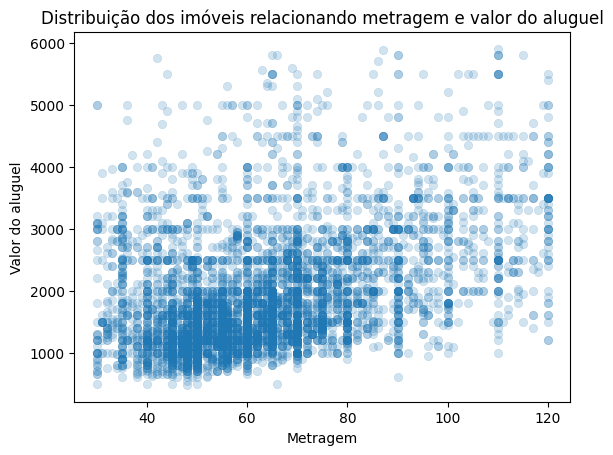

In [55]:
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=dfabc, alpha = 0.2, edgecolor=None)
plt.xlabel('Metragem')
plt.ylabel('Valor do aluguel')
plt.title('Distribuição dos imóveis relacionando metragem e valor do aluguel')
plt.show()

Apesar de observarmos uma grande dispersão, há uma concentração entre imóveis de 40m² à 80m² custarem até três mil reais.

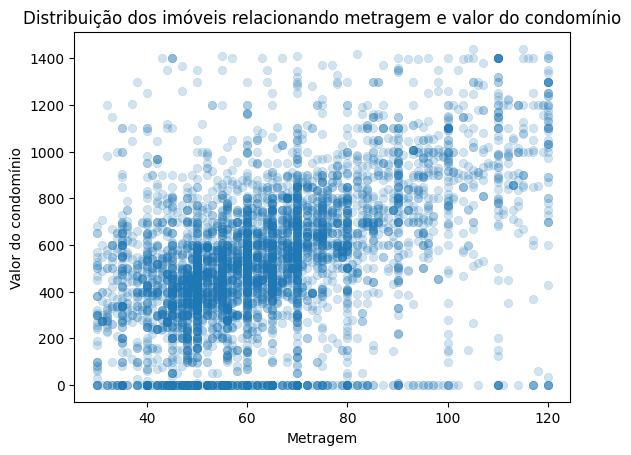

In [56]:
sns.scatterplot(x='Metragem', y='Valor_Condominio', data=dfabc, alpha = 0.2, edgecolor=None)
plt.xlabel('Metragem')
plt.ylabel('Valor do condomínio')
plt.title('Distribuição dos imóveis relacionando metragem e valor do condomínio')
plt.show()

Observamos uma crescente do valor do condomínio em relação a metragem dos imóveis.

<ipython-input-68-6fc6a57b7234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfabc['N_Quartos_categorizado'] = pd.Categorical(dfabc['N_Quartos'].astype(str), ordered=True)


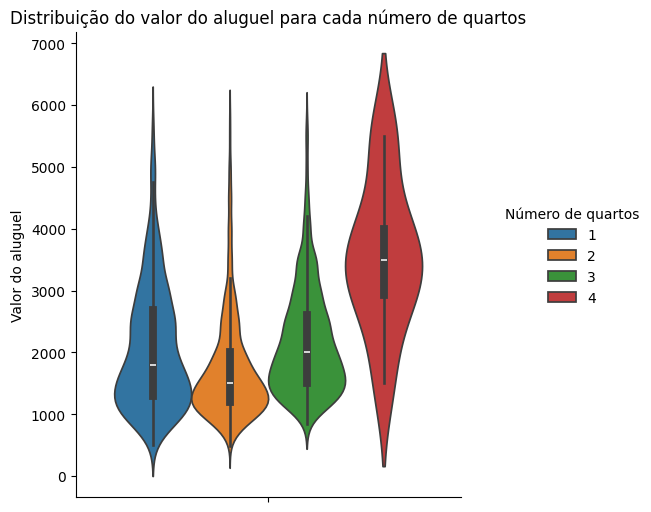

In [68]:
dfabc['N_Quartos_categorizado'] = pd.Categorical(dfabc['N_Quartos'].astype(str), ordered=True)
g = sns.catplot(hue = 'N_Quartos_categorizado', y = 'Valor_Aluguel', data = dfabc, kind = 'violin')
plt.ylabel('Valor do aluguel')
plt.title('Distribuição do valor do aluguel para cada número de quartos')
legend = g._legend
legend.set_title("Número de quartos")
plt.show()

A distribuição do valor de aluguel em relação ao número de quartos é bem ampla. No entanto, há uma concentração de unidades de um, dois ou três quartos custarem entre mil e dois mil reais. Imóveis com quatro quartos se concentram em aluguel de três à quatro mil reais.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




<ipython-input-69-5f5a8b6af6af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfabc.drop('N_Quartos_categorizado', axis=1, inplace=True)


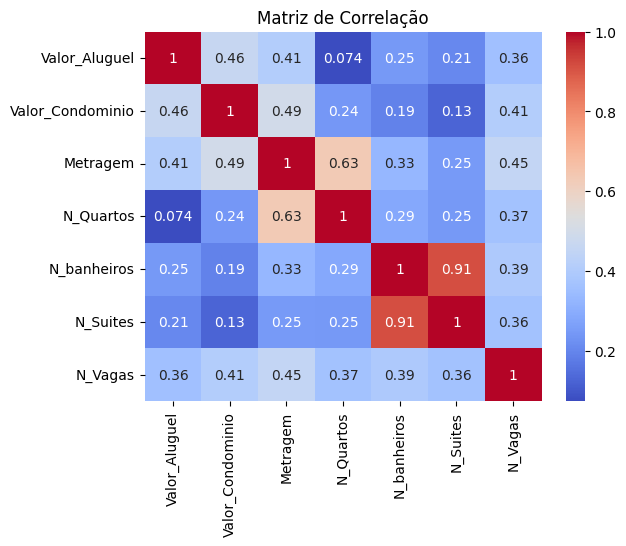

In [69]:
dfabc.drop('N_Quartos_categorizado', axis=1, inplace=True)
matrizcorrelacao = dfabc.corr()
sns.heatmap(matrizcorrelacao, annot=True, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

O valor do aluguel se relaciona mais fortemente com o valor do condomínio e a metragem, no entando é uma correlação abaixo de 0.5 em ambos os casos.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [18]:
x = dfabc.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = dfabc['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [20]:
x = x_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [24]:
regressao = LinearRegression()
regressao.fit(x, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [25]:
regressao.intercept_

727.1252121059017

In [26]:
regressao.coef_

array([18.80322236])

Nossa equação seria:Y = 18.8x + 727.13  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [27]:
regressao.score(x,y)

0.15713928550549494

Podemos observar que apenas 16% da variação do preço do aluguel é explicado pela metragem. Tivemos nessa regressão um índice muito baixo para fazer previsões.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

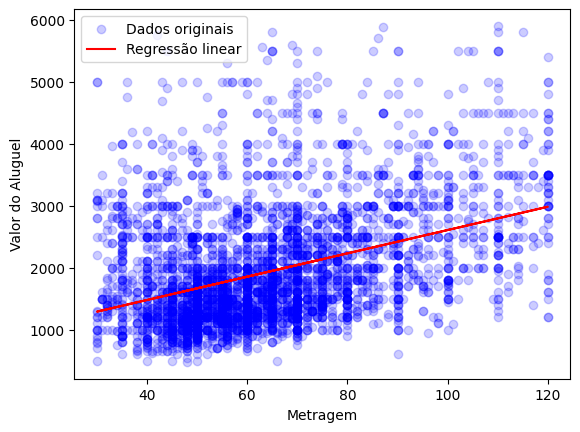

In [29]:
plt.scatter(x, y, color='blue', label='Dados originais', alpha = 0.2)
plt.plot(x, regressao.predict(x), color='red', label='Regressão linear')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.legend()
plt.show()

Apesar de haver uma grande dispersão dos dados, a regressão linear simples conseguiu seguir a concentração deles e apresentar uma crescente do valor do aluguel em relação a metragem dos imóveis.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [30]:
x_test = x_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [32]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao.predict(x_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao.score(x_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.18712520604085503


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Apesar de termos um índice com baixa porcentagem (menor do que 20%) na regresão linear simples, o r² da base de teste está próximo do r² da base de treino, o que nos sugere que ele está conseguindo fazer uma generalização dentro da alta dispersão dos dados.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [33]:
xmult = dfabc.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
ymult = dfabc['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [34]:
xmult_train, xmult_test, ymult_train, ymult_test = train_test_split(xmult, ymult, test_size=0.25, random_state=42)

In [35]:
p = xmult_train
q = ymult_train

In [36]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(p, q)

LinearRegression()

In [37]:
regressao_multipla.intercept_

743.1366337541826

In [38]:
regressao_multipla.coef_

array([   0.84225819,   16.83872572, -428.57603533,   81.83599878,
        105.35220932,  294.00175997])

Y = 0.84a + 16.84b -428.58c + 81.84d + 105.35e + 294f + 743.14.

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [39]:
regressao_multipla.score(p,q)

0.32627113164743726

Note que o r² na base de treino da regressão **múltipla** é melhor do que na base de treino da regressão **simples**



D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [50]:
s = xmult_test[['Valor_Condominio', 'Metragem','N_Quartos', 'N_banheiros','N_Suites', 'N_Vagas']] # Variável independente (características)
t = ymult_test  # Variável dependente (rótulo)

In [51]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoesmult = regressao_multipla.predict(s)

# Avaliando o desempenho do modelo usando métricas como o R²
r2mult = regressao_multipla.score(s, t)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2mult)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.3542931170990662


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

O r² das bases de teste da regressão múltipla foi duas vezes melhor (36%) do que o da regressão simples(18%). No entanto, ele é capaz de explicar apenas 36% do alugel com base nos outros dados fornecidos.